# Shark Attacks Analysis

<p><a href="https://commons.wikimedia.org/wiki/File:Great_white_shark_size_comparison.svg#/media/File:Great_white_shark_size_comparison.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Great_white_shark_size_comparison.svg/1200px-Great_white_shark_size_comparison.svg.png" alt="Great white shark size comparison.svg"></a><br>

### Import libraries, styles and database

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import emoji

In [6]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [7]:
attacks = pd.read_csv("attacks_clean.csv",encoding = "ISO-8859-1")

### 🦈 1) About 90% of shark attacks are lethal

In [16]:
table_0 = table_1.groupby(['year']).agg({'survived': 'count'}).unstack().transpose()
table_0a = table_1.groupby(['year', 'survived']).agg({'survived': 'count'}).unstack().transpose()
table_0a['avg'] = table_0a.mean(numeric_only=True, axis=1)
table_0a

year               2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
         survived                                                               
survived N           98    97    89   104    98   101   109   121   114   115   
         Y           10    13     8    14     9    13     7     9     5     8   

year                 avg  
         survived         
survived N         104.6  
         Y           9.6

### 🦈 2) July and August are the peak months for attacks

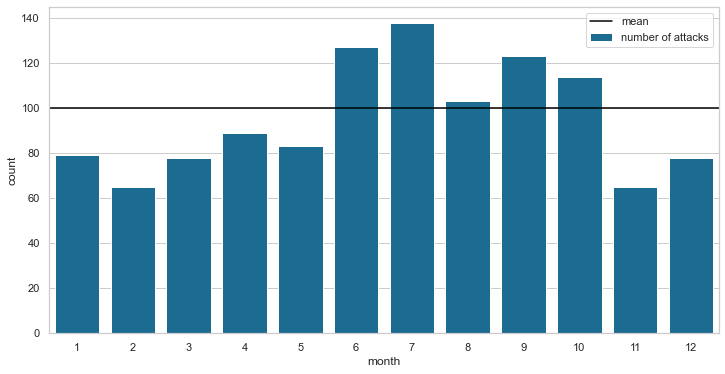

In [17]:
fig1 = sns.countplot(x=table_1.month, palette=['#0774a4'], label='number of attacks')
fig1.axhline(y=100, c='black', label='mean')
plt.legend();

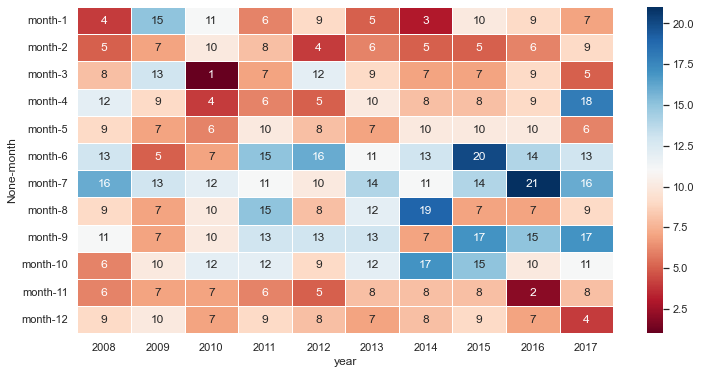

In [10]:
table_1 = attacks[(attacks.year>2007) & (attacks.year<2018) & (attacks.month>0) & (attacks.survived != 'Unknown')]
table_1a = table_1.groupby(['year', 'month']).agg({'month' : 'count'}).unstack().transpose()
sns.heatmap(table_1a, cmap='RdBu', linewidths=1, annot=True);

### 🦈 3) Most attacks ocurr between 10am to 5pm

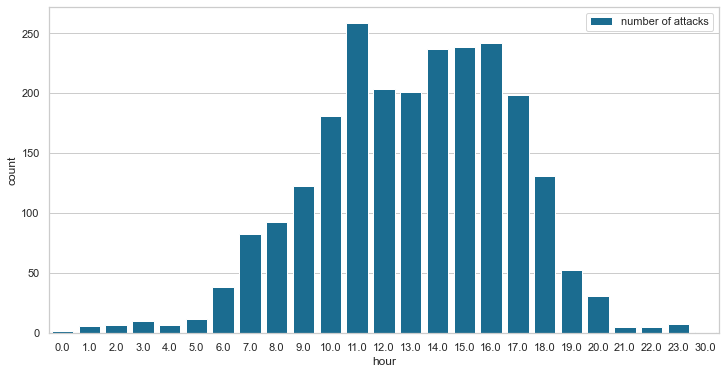

In [11]:
sns.countplot(x=attacks.hour, palette=['#0774a4'], label='number of attacks')
plt.legend();

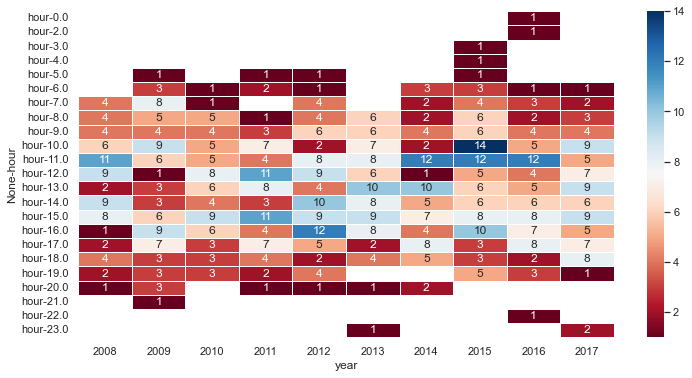

In [12]:
table_2 = attacks[(attacks.year>2007) & (attacks.year<2018) & (attacks.hour<25)]
table_2a = table_2.groupby(['year', 'hour']).agg({'hour' : 'count'}).unstack().transpose()
sns.heatmap(table_2a, cmap='RdBu', linewidths=1, annot=True);

### 🦈 4) Most attacks come from White Sharks located in US, South Africa and Australia

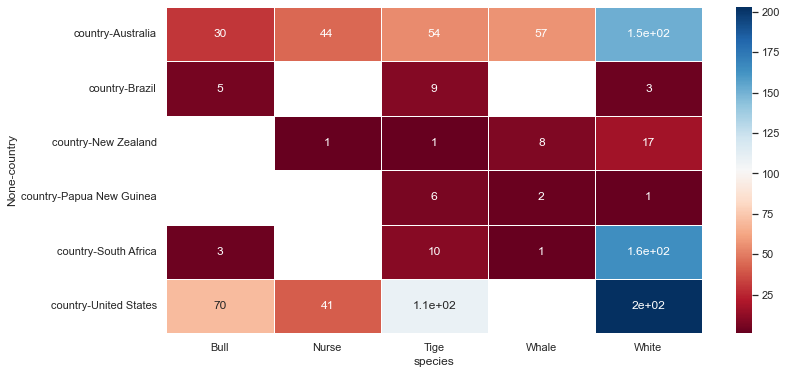

In [13]:
cn = list(dict(attacks["country"].value_counts()[0:6]).keys())
sp = list(dict(attacks.species.value_counts()[0:6]))
table_3 = attacks[(attacks["species"].isin(sp)) &  (attacks["country"].isin(cn)) & (attacks['species'] != 'Unknown') & (attacks['country'] != 'Unknown')]
table_3a = table_3.groupby(['species', 'country']).agg({'country' : 'count'}).unstack().transpose()
sns.heatmap(table_3a, cmap='RdBu', linewidths=1, annot=True);

### 🦈 5) 20 to 40 year old Divers and Swimmers are the most prone to be attacked by sharks

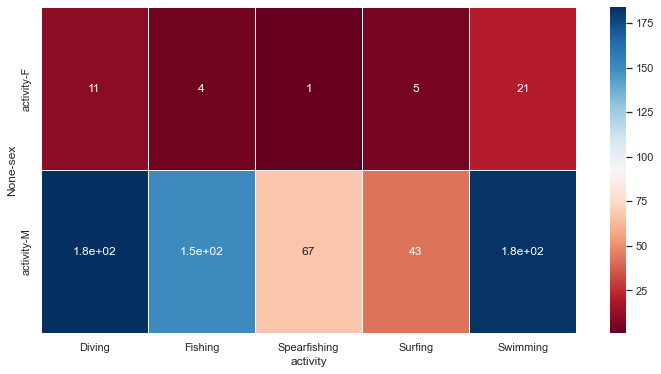

In [18]:
table_4a = table_4.groupby(['activity', 'sex']).agg({'activity' : 'count'}).unstack().transpose()
sns.heatmap(table_4a, cmap='RdBu', linewidths=1, annot=True);

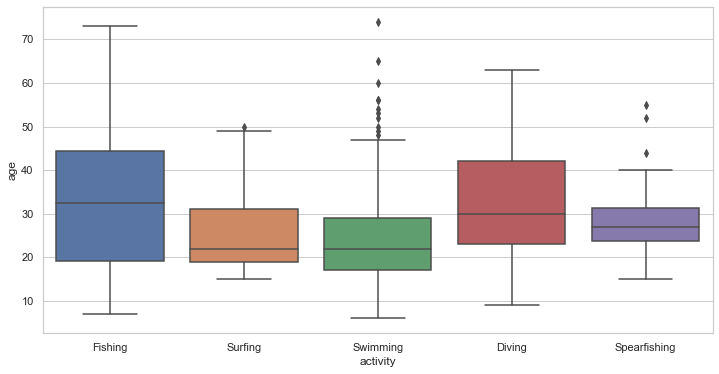

In [15]:
ac = list(dict(attacks["activity"].value_counts()[0:6]).keys())
table_4 = attacks[(attacks["activity"].isin(ac)) & (attacks['activity'] != 'Unknown') & (attacks['sex'] != 'Unknown')& (attacks['survived'] != 'Unknown')]
sns.boxplot(x='activity', y='age', data=table_4);

### Conclusion 🦈

#### This analysis was conducted with the purpose of understanding the behavior of shark attacks in human.

Shark attacks happen,on average, more than 100 times a year and almost all of them end up being lethal.

Most of the attacks are evenly distributed throughout the year, although June and July are above average.

Such attacks tend to happen during daylight (9am - 6pm), when swimmers, divers and fishermen spend most of their time.

That is also why these three are the most prone to be attacked by sharks.

Shark species overall, do not all seem to be aggressive towards humans. As Whites and Tigers concentrate the majority of attacks.

These species are found in the U.S., South Africa and Australia, where as well most of the attacks are recorded.